# Prediction using Decision Tree algorithm

## Data preprocessing

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [50]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
data.dropna()
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Training data set

In [54]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
data['species'].unique()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_train=le.fit_transform(y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=0,test_size=0.2)

## Applying the decision tree algorithm

***Decision tree classifier***

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=4)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=4)

In [57]:
y_predicted=tree_clf.predict(x_test)
y_predicted

array(['versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa'],
      dtype=object)

***Decision tree regressor***

In [58]:
from sklearn.tree import DecisionTreeRegressor
tree_rg=DecisionTreeRegressor(max_depth=4,random_state=42)
tree_rg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [86]:
y_predict=tree_rg.predict(x_test)
y_predict

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

## Visualizing decision tree 

***decision tree classifier(text representation)***

In [73]:
from sklearn.tree import export_text
text_representation = export_text(tree_clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: versicolor
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



***decision tree classifier(graphical representation)***

<IPython.core.display.Javascript object>


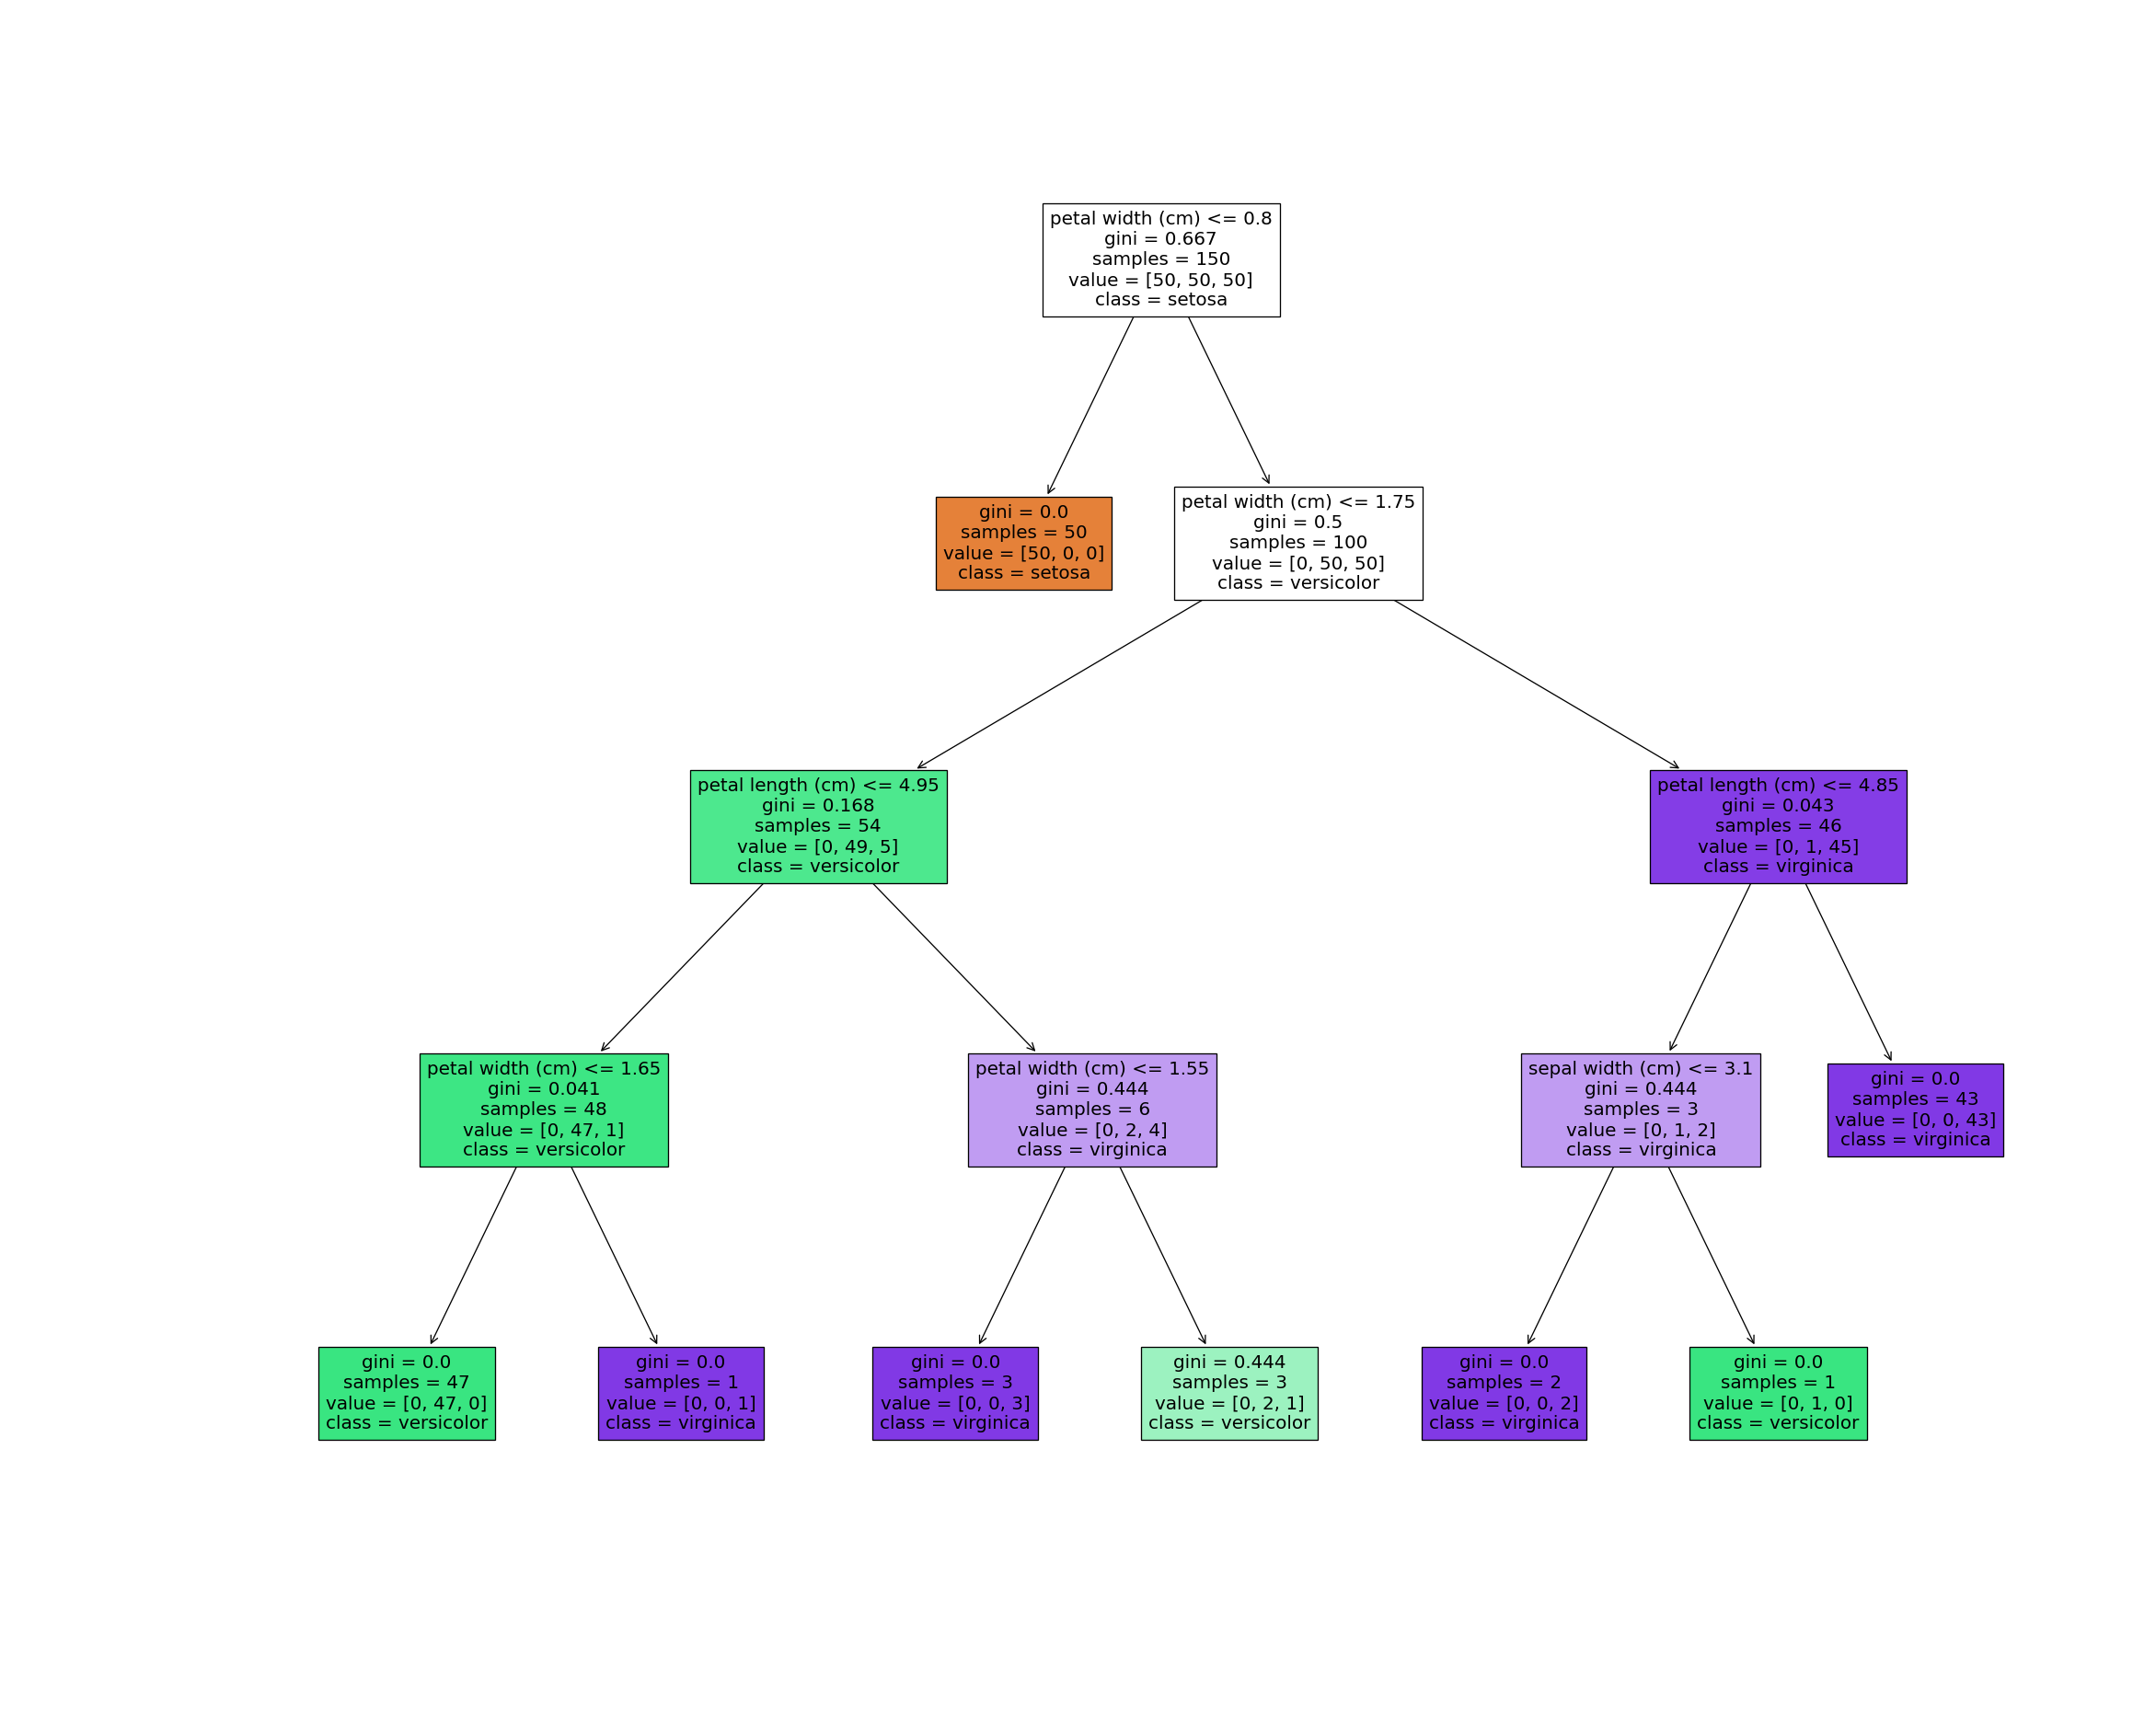

In [72]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target_names=['setosa', 'versicolor', 'virginica']
_ = tree.plot_tree(tree_clf, feature_names=feature_names,class_names=target_names,filled=True)

***decision tree regressor(textual representation)***

In [75]:
text_representation=export_text(tree_rg)
print(text_representation)

|--- feature_2 <= -0.80
|   |--- value: [0.00]
|--- feature_2 >  -0.80
|   |--- feature_3 <= 0.72
|   |   |--- feature_2 <= 0.68
|   |   |   |--- feature_3 <= 0.59
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_3 >  0.59
|   |   |   |   |--- value: [2.00]
|   |   |--- feature_2 >  0.68
|   |   |   |--- feature_3 <= 0.46
|   |   |   |   |--- value: [2.00]
|   |   |   |--- feature_3 >  0.46
|   |   |   |   |--- value: [1.33]
|   |--- feature_3 >  0.72
|   |   |--- feature_2 <= 0.62
|   |   |   |--- feature_1 <= 0.10
|   |   |   |   |--- value: [2.00]
|   |   |   |--- feature_1 >  0.10
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_2 >  0.62
|   |   |   |--- value: [2.00]



***decision tree regressor(graphical representation)***

<IPython.core.display.Javascript object>


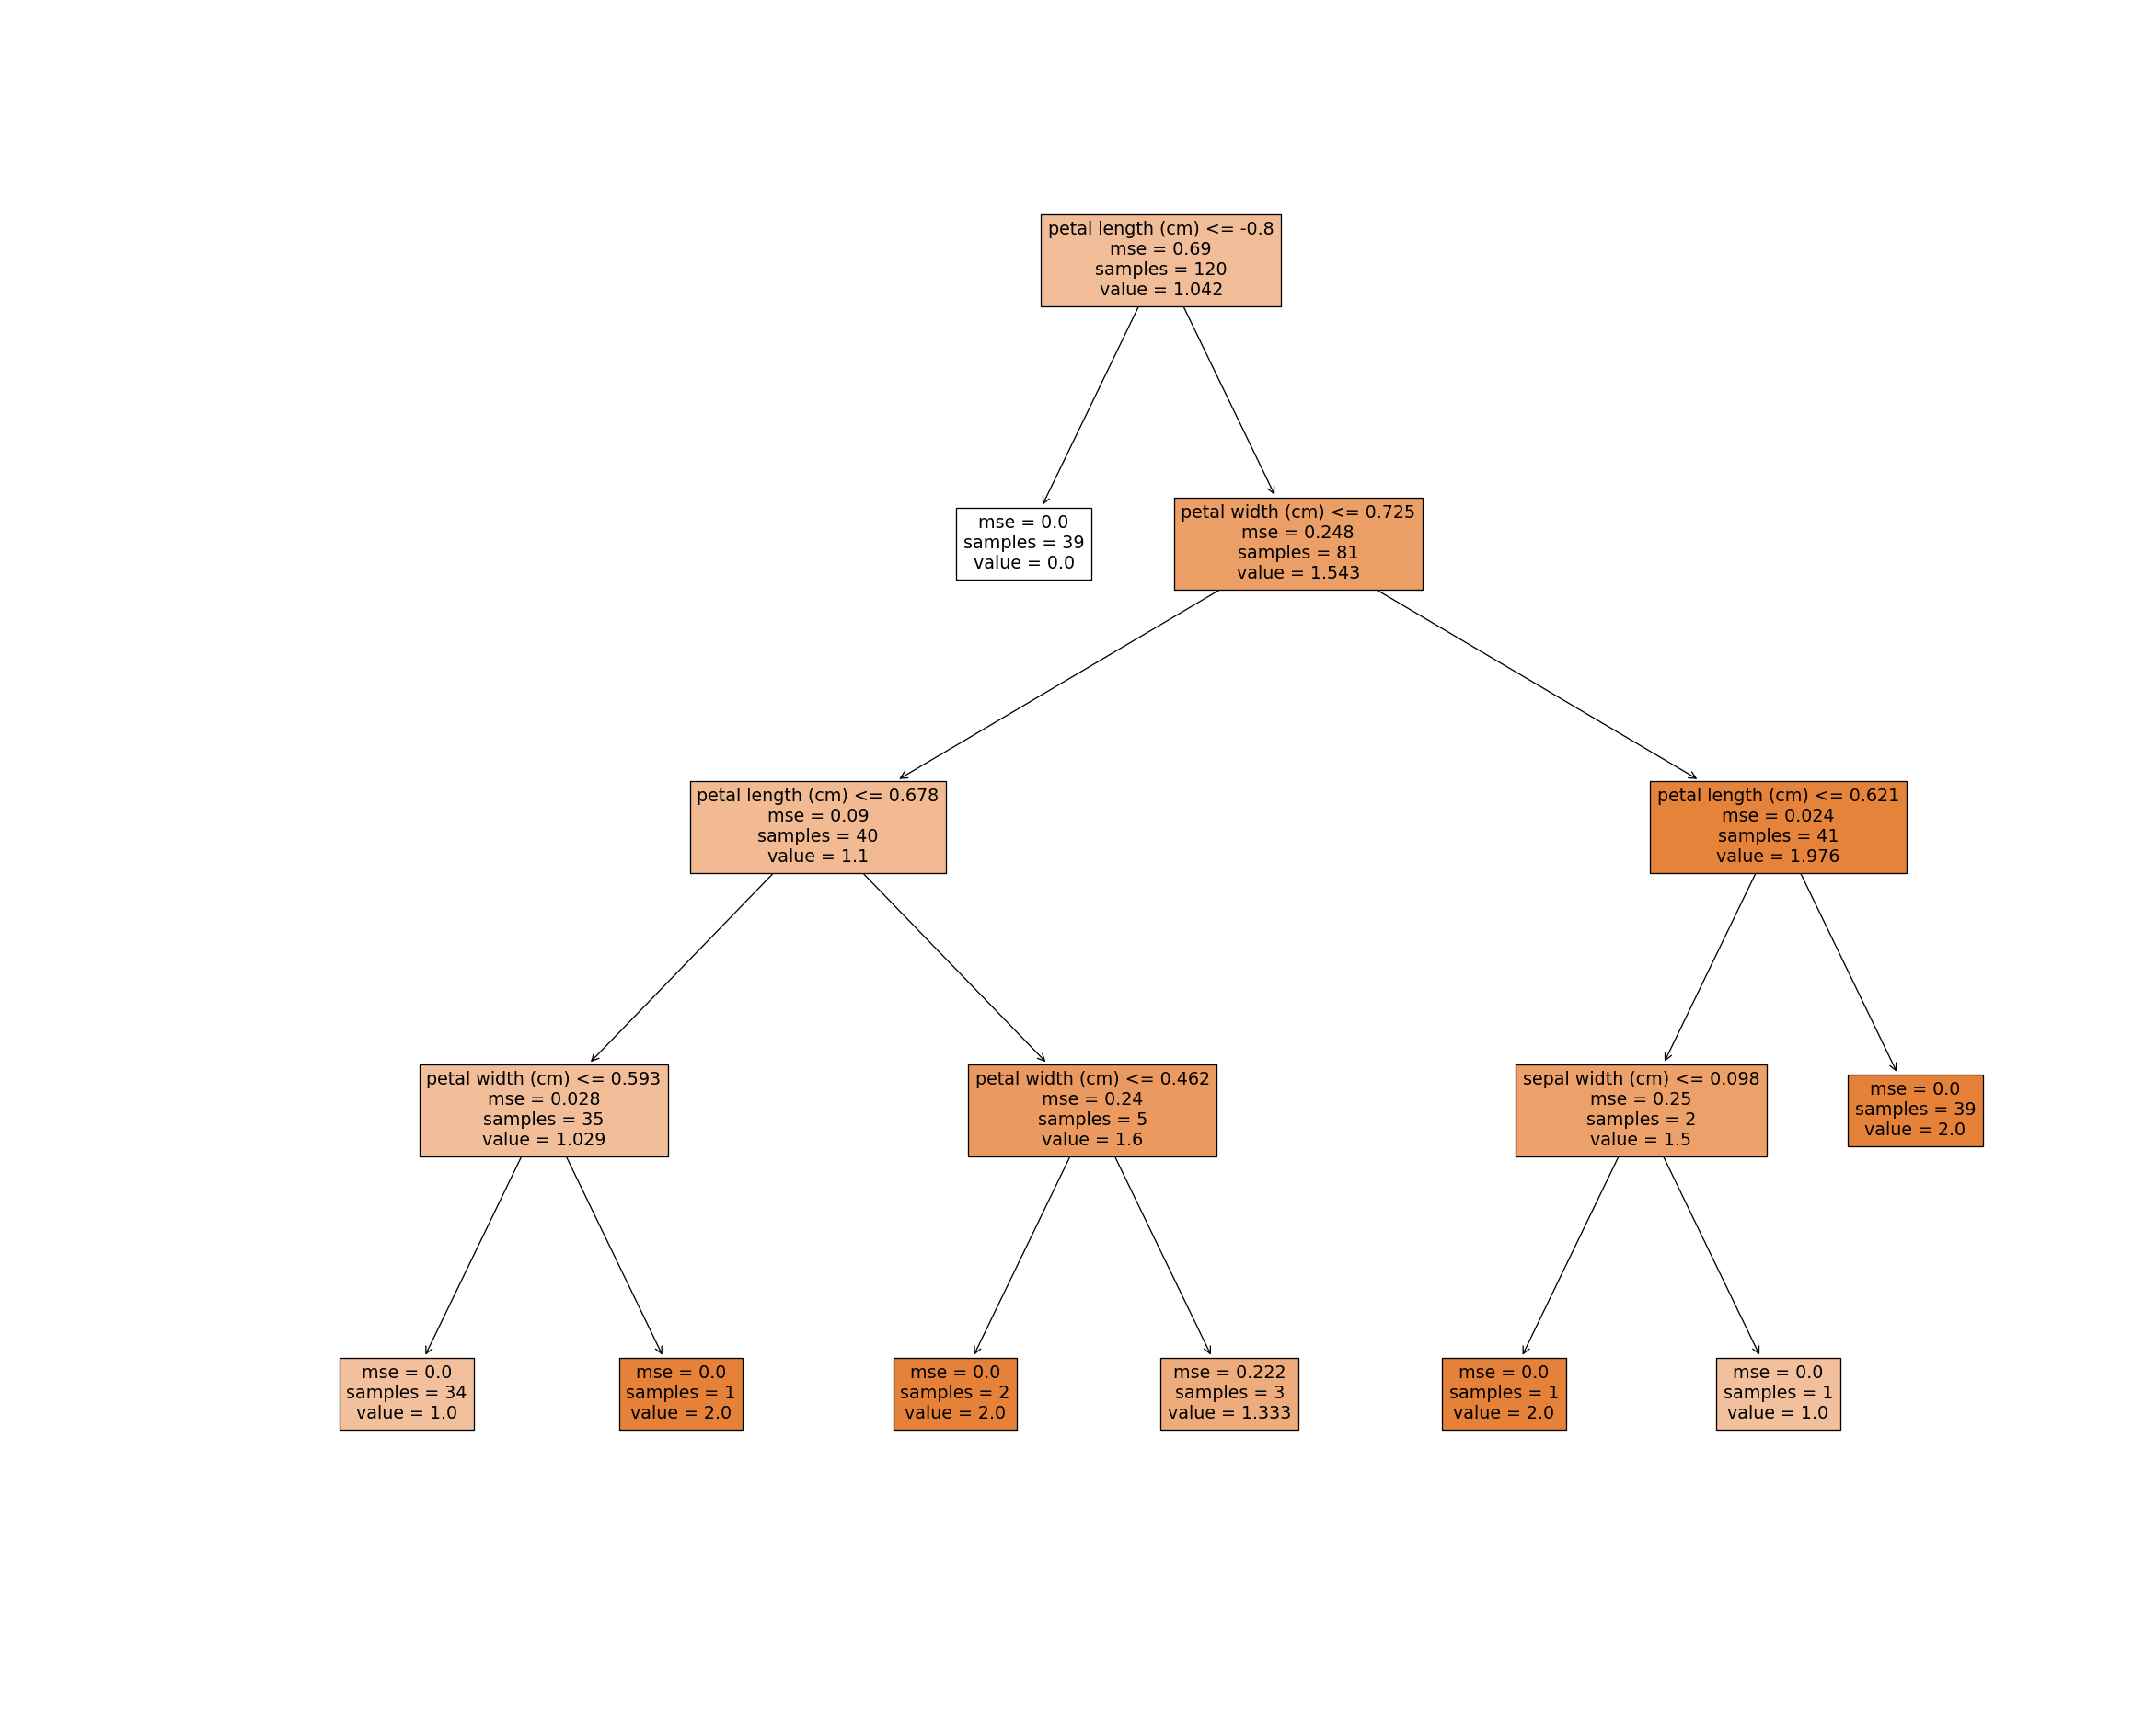

In [70]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target_names=['setosa', 'versicolor', 'virginica']
_ = tree.plot_tree(tree_rg, feature_names=feature_names,class_names=target_names,filled=True)

## Making predictions

In [60]:
s_l=float(input())
s_w=float(input())
p_l=float(input())
p_w=float(input())
type=np.array([[s_l,s_w,p_l,p_w]])
prediction=tree_clf.predict(type)
print("the sepal length,sepal width,petal length,petal width of the given iris is {},{},{},{} respectively".format(s_l,s_w,p_l,p_w))
print("the classified species having the above traits {}".format(prediction))

5
2
0.4
0.3
the sepal length,sepal width,petal length,petal width of the given iris is 5.0,2.0,0.4,0.3 respectively
the classified species having the above traits ['setosa']


## accuracy of the model  

***classification accuracy***

In [87]:
import sklearn
print('classification accuracy:.{}'.format(sklearn.metrics.accuracy_score(y_test,y_predict)))#testing the accuracy of the model

classification accuracy:.1.0


***classification error***

In [88]:
print(1 - sklearn.metrics.accuracy_score(y_test, y_predicted))

1.0


***mean absolute error***

In [90]:
from sklearn import metrics
print('Mean Absolute Error:.{}'.format(metrics.mean_absolute_error(y_test, y_predict))) #mean absolute error

Mean Absolute Error:.0.0


***classification report***

In [92]:
print(sklearn.metrics.classification_report(y_test,y_predict))#classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



***confusion matrix***

In [94]:
print(sklearn.metrics.confusion_matrix(y_test, y_predict))#confusion matrix      

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
